In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
SPY = pdr.get_data_yahoo("SPY", 
                          start= "2017-01-01", 
                          end="2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
spy = pd.DataFrame(SPY)

In [5]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,212.796539,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,214.062500,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,213.892410,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,214.657684,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,213.949142,46939700


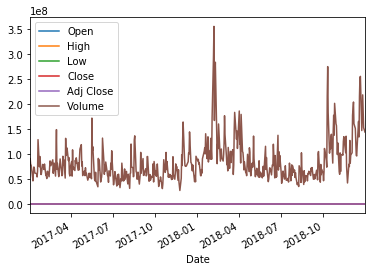

In [6]:
spy.plot()

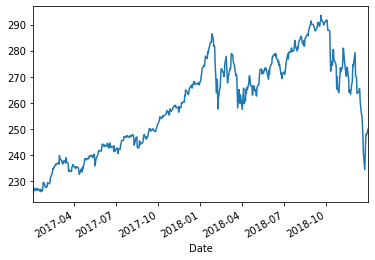

In [8]:
spy_close = spy['Close']
spy_close.plot()

In [10]:
spy_close.head()

Date
2017-01-03    225.240005
2017-01-04    226.580002
2017-01-05    226.399994
2017-01-06    227.210007
2017-01-09    226.460007
Name: Close, dtype: float64

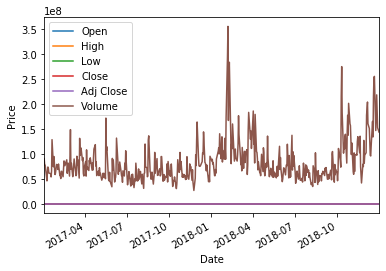

In [30]:
def plot_data(data, title):
    ax = data.plot()
    ax.set_xlabel("Date")
    ax.set_ylabel(title)
    plt.show()
    
plot_data(spy,"Price")

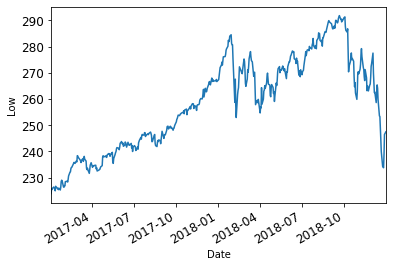

In [15]:
plot_data(spy["Low"],"Low")

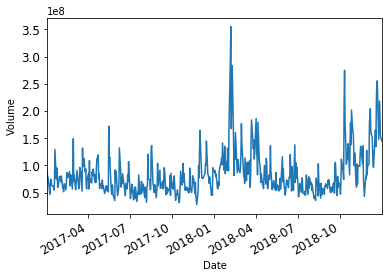

In [16]:
plot_data(spy["Volume"],"Volume")

In [114]:
sp = pd.read_csv('data/sp500.csv', parse_dates=True, usecols = ["Date","Open","High","Low","Close","Adj Close", "Volume"], na_values=["nan"])
type(sp)

pandas.core.frame.DataFrame

In [115]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000
1,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000
2,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000
3,2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000
4,2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000


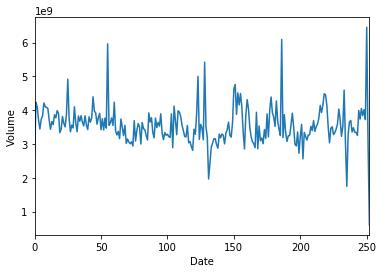

In [116]:
plot_data(sp["Volume"], "Volume")

## Daily Returns

In [117]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000
1,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000
2,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000
3,2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000
4,2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000


In [118]:
# closing price of today divided by yesterday price
def compute_daily_returns(df):
    result = df[:-1].values / df[1:] - 1
    return result

In [119]:
sp["Daily Returns"] = compute_daily_returns(sp["Close"])
sp["Daily Returns"].fillna(0, inplace=True)
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,0.000000
1,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,-0.047250
2,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,-0.008490
3,2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,0.001243
4,2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000,-0.008421


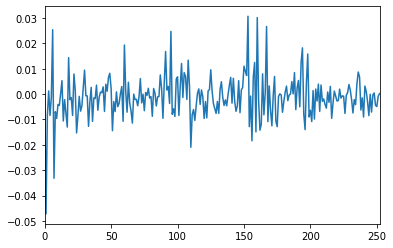

In [120]:
sp["Daily Returns"].plot()

## Discovering outliers

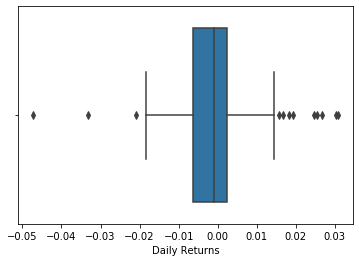

In [127]:
import seaborn as sns
sns.boxplot(x=sp["Daily Returns"])

## The interquartile range (IQR)

In [122]:
Q1 = sp["Daily Returns"].quantile(0.25)
Q3 = sp["Daily Returns"].quantile(0.75)
IQR = Q3 - Q1
IQR

0.008562825358319981

In [154]:
len(sp)

253

In [174]:
sp_out = sp[~(sp["Daily Returns"] < Q1 - (1.5 * IQR)) | (sp["Daily Returns"] > Q3 + (1.5 * IQR))]

In [175]:
len(sp_out)

250

## Mean and Standard Deviation

In [176]:
mean = sp_out["Daily Returns"].mean()

In [177]:
std = sp_out["Daily Returns"].std()

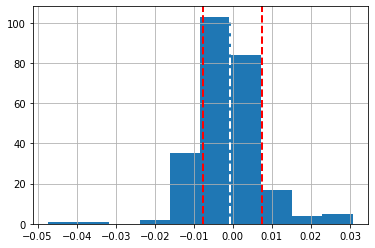

In [178]:
daily_returns.hist(bins=10)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)